In [3]:
import pandas as pd
from datetime import datetime
from pytz import utc
data = pd.read_csv('reviews.csv', parse_dates=['Timestamp'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   Course Name  45000 non-null  object             
 1   Timestamp    45000 non-null  datetime64[ns, UTC]
 2   Rating       45000 non-null  float64            
 3   Comment      6799 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), object(2)
memory usage: 1.4+ MB


array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

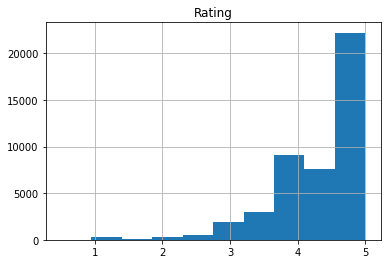

In [4]:
data.hist('Rating')

In [4]:
data[(data['Timestamp'] >= datetime(2020,7,1,tzinfo=utc)) & (data['Timestamp'] <= datetime(2020, 12, 31, tzinfo=utc))]

,Course Name,Timestamp,Rating,Comment
3065,Interactive Data Visualization with Python and...,2020-12-30 23:28:34+00:00,3.0,NaN
3066,The Python Mega Course: Build 10 Real World Ap...,2020-12-30 22:59:02+00:00,4.0,NaN
3067,The Python Mega Course: Build 10 Real World Ap...,2020-12-30 22:40:10+00:00,4.5,NaN
3068,The Python Mega Course: Build 10 Real World Ap...,2020-12-30 21:56:41+00:00,4.5,NaN
3069,The Python Mega Course: Build 10 Real World Ap...,2020-12-30 21:14:34+00:00,4.5,NaN
...,...,...,...,...
9729,The Python Mega Course: Build 10 Real World Ap...,2020-07-01 03:09:44+00:00,3.5,NaN
9730,The Python Mega Course: Build 10 Real World Ap...,2020-07-01 03:09:12+00:00,5.0,NaN
9731,The Python Mega Course: Build 10 Real World Ap...,2020-07-01 02:40:58+00:00,4.0,NaN
9732,The Python Mega Course: Build 10 Real World Ap...,2020-07-01 02:04:02+00:00,5.0,nice


# from data to information

## Average rating

In [5]:
data['Rating'].mean()

4.442155555555556

## Average rating for particular course

In [7]:
data[data['Course Name'] == 'The Python Mega Course: Build 10 Real World Applications']['Rating'].mean()

4.477270180942244

## Average rating for particular period

In [9]:
data[(data['Timestamp'] >= datetime(2020,1,1,tzinfo=utc)) &
 (data['Timestamp'] <= datetime(2020, 12, 31, tzinfo=utc))]['Rating'].mean()

4.476541271662339

## Average rating for a particular period for a particular course

In [11]:
data[(data['Timestamp'] >= datetime(2020,1,1,tzinfo=utc)) &
 (data['Timestamp'] <= datetime(2020, 12, 31, tzinfo=utc)) &
 (data['Course Name'] == 'The Python Mega Course: Build 10 Real World Applications')]['Rating'].mean()

4.506076089208037

## Average of uncommented ratings

In [12]:
data[data['Comment'].isnull()]['Rating'].mean()

4.433679746603492

## average of commented ratings

In [13]:
data[data['Comment'].notnull()]['Rating'].mean()

4.489777908515959

## Number of uncommented ratings

In [14]:
data[data['Comment'].isnull()]['Rating'].count()

38201

## number of commented ratings

In [15]:
data[data['Comment'].notnull()]['Rating'].count()

6799

## number of comments containing a certain word

In [17]:
data[(data['Comment'].notnull()) & (data['Comment'].str.contains('accent'))]['Rating'].count()

77

## average of commented ratings with "acccent" in comment

In [18]:
data[(data['Comment'].notnull()) & (data['Comment'].str.contains('accent'))]['Rating'].mean()

3.8636363636363638